In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityData_df = pd.read_csv("city_data.csv")
rideData_df = pd.read_csv("ride_data.csv")

# Read the City and Ride Data
#cityRide_df = pd.merge(cityData_df, )
# Combine the data into a single dataset

# Display the data table for preview


In [4]:
# Read the City and Ride Data
cityRide_df = pd.merge(rideData_df, cityData_df, how="outer", on="city", sort=False)
cityRide_df.head

<bound method NDFrame.head of                     city                 date   fare        ride_id  \
0     Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1     Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2     Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3     Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4     Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   
5     Lake Jonathanshire  2018-04-06 11:30:32  16.84  6164453571846   
6     Lake Jonathanshire  2018-03-21 00:18:34  37.95  8353656732934   
7     Lake Jonathanshire  2018-01-28 00:07:00   5.67  9756573174778   
8     Lake Jonathanshire  2018-01-24 12:24:22  34.65  3319117904437   
9     Lake Jonathanshire  2018-03-24 16:27:49  14.94  1670908453476   
10    Lake Jonathanshire  2018-04-11 22:10:30  12.81  5999870428814   
11    Lake Jonathanshire  2018-01-23 21:43:16  21.11  7711472105447   
12    Lake Jonathanshire  2018-01-29 00:19:07  

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


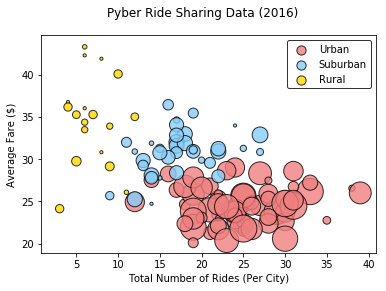

In [12]:
cityName = cityRide_df.groupby("city")
driverCount = cityName.mean()["driver_count"]
cityType = cityData_df.set_index("city")["type"]
avgFare = cityName.mean()["fare"]
rideCount = cityName["ride_id"].count()
df = pd.DataFrame({"Number of Rides": rideCount, "Type of City": cityType,
                  "Average Fare": avgFare, "Number of Drivers": driverCount})
df.sort_values("Number of Drivers", ascending = False)
urban = df[df["Type of City"] == "Urban"]
suburban = df[df["Type of City"] == "Suburban"]
rural = df[df["Type of City"] == "Rural"]
colors = {"Light Sky Blue": "#87CEFA", "Gold": "#FFD700", "Light Coral": "#F08080"}
colorDict = {"Urban": colors["Light Coral"], "Suburban": colors["Light Sky Blue"], "Rural": colors["Gold"]}
plt.scatter(urban["Number of Rides"], urban["Average Fare"], s = urban["Number of Drivers"]*10, color = colorDict["Urban"],
           edgecolor = "black", label = "Urban", alpha = 0.8)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], s = suburban["Number of Drivers"]*10, color = colorDict["Suburban"],
           edgecolor = "black", label = "Suburban", alpha = 0.8)
plt.scatter(rural["Number of Rides"], rural["Average Fare"], s = rural["Number of Drivers"]*10, color = colorDict["Rural"],
           edgecolor = "black", label = "Rural", alpha = 0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.suptitle("Pyber Ride Sharing Data (2016)")
lgnd = plt.legend(edgecolor = "black")
lgnd.legendHandles[0]._sizes = [85]
lgnd.legendHandles[1]._sizes = [85]
lgnd.legendHandles[2]._sizes = [85]

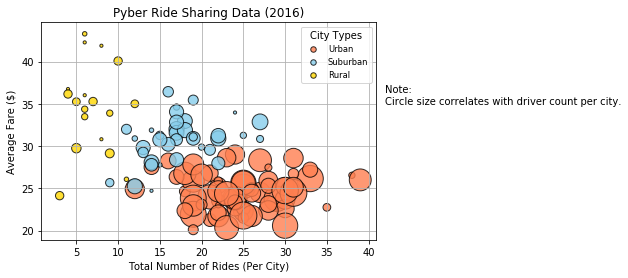

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [7]:
dataByCityType = cityRide_df.groupby("type")

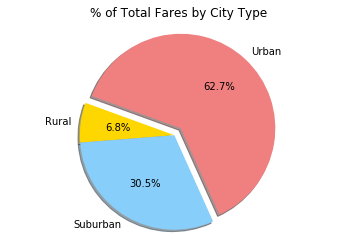

In [14]:
totalFares = dataByCityType.sum()["fare"]
labels = totalFares.index
chartColors = [colorDict[i] for i in labels]
explode = [0, 0, .1]
plt.pie(totalFares, startangle = 160, colors = chartColors, explode = explode, labels = labels,
       autopct = "%1.1f%%", shadow = True,) 
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

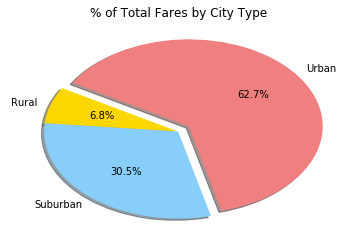

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


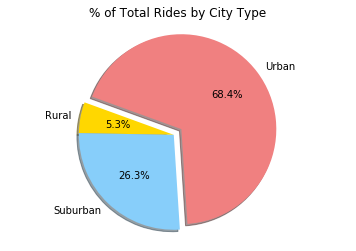

In [15]:
totalRides = dataByCityType.count()["ride_id"]
labels = totalRides.index
chartColors = [colorDict[i] for i in labels]
explode = [0, 0, .1]
plt.pie(totalRides, startangle = 160, colors = chartColors, explode = explode, labels = labels,
       autopct = "%1.1f%%", shadow = True,) 
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

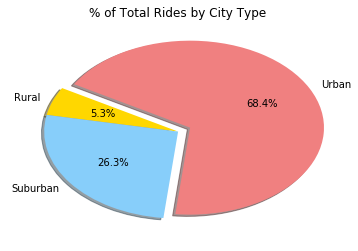

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


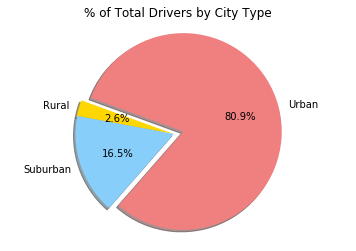

In [18]:
totalDrivers = cityData_df.groupby("type").sum()["driver_count"]
labels = totalRides.index
chartColors = [colorDict[i] for i in labels]
explode = [0, 0, .1]
plt.pie(totalDrivers, startangle = 160, colors = chartColors, explode = explode, labels = labels,
       autopct = "%1.1f%%", shadow = True,) 
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

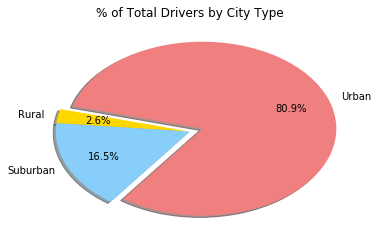

In [6]:
# Show Figure
plt.show()